In [ ]:
###################
# 1. 모듈 가져오기
import numpy as np
import pandas as pd

# 파이썬에서 통계분석에 편리한 도구를 제공하는 모듈
# 편리한 통계 분석 도구를 제공하는 패키지
import statsmodels.api as sm
'''
R과 관련된 분석 모형들중
- 검정, 추정
- 회귀분석
- 시계열분석
이런 항목들을 R 스타일로 제공해 준다, 거의 방법론이 똑같다
'''
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path = '/content/top10_variable.csv'
top10_variable = pd.read_csv( path, encoding = 'utf-8')

In [ ]:
top10_variable.set_index( 'Date', inplace=True)

In [ ]:
top10_variable.head()

,Adj Close,name,code,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,,,,
2020-02-14,28500.0,일진다이아,81000,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,28300.0,일진다이아,81000,1182.2,52.05,9732.74,29232.19,1.23
2020-02-19,27950.0,일진다이아,81000,1188.1,53.29,9817.18,29348.03,1.24
2020-02-20,29350.0,일진다이아,81000,1190.8,53.78,9750.97,29219.98,1.23
2020-02-21,28400.0,일진다이아,81000,1197.0,53.38,9576.59,28992.41,1.23


In [ ]:
top10_variable.name.unique()

array(['일진다이아', '디피씨', '효성중공업', 'JW중외제약우', '코오롱머티리얼', '현대건설우', '유니온머티리얼',
       '두산2우B', '모나미', '드림텍'], dtype=object)

In [ ]:
top10_variable.columns


Index(['Adj Close', 'name', 'code', 'dollar', 'WTI', 'NASDAQ', 'DOW',
       'interest_rate'],
      dtype='object')

In [ ]:
top10_variable.dtypes

Adj Close        float64
name              object
code               int64
dollar           float64
WTI              float64
NASDAQ           float64
DOW              float64
interest_rate    float64
dtype: object

In [ ]:
df = pd.DataFrame({'name': ['일진다이아', '디피씨', '효성중공업', 'JW중외제약우', '코오롱머티리얼', '현대건설우', '유니온머티리얼', '두산2우B', '모나미', '드림텍'], 
                          'val': np.arange(10)})

In [ ]:
variable = list()
for i in range(10):
  variable.append(top10_variable[106*i:(i+1)*106])

In [ ]:
variable[0]['name'][0]

'일진다이아'

In [ ]:
variable[0]

,Adj Close,name,code,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,,,,
2020-02-14,28500.0,일진다이아,81000,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,28300.0,일진다이아,81000,1182.2,52.05,9732.74,29232.19,1.23
2020-02-19,27950.0,일진다이아,81000,1188.1,53.29,9817.18,29348.03,1.24
2020-02-20,29350.0,일진다이아,81000,1190.8,53.78,9750.97,29219.98,1.23
2020-02-21,28400.0,일진다이아,81000,1197.0,53.38,9576.59,28992.41,1.23
...,...,...,...,...,...,...,...,...
2020-07-16,57200.0,일진다이아,81000,1200.7,40.75,10473.83,26734.71,0.49
2020-07-17,56600.0,일진다이아,81000,1204.1,40.59,10503.19,26671.95,0.46
2020-07-20,59000.0,일진다이아,81000,1205.7,40.81,10767.09,26680.87,0.44


In [ ]:
import seaborn as sns

In [ ]:
cols = ['dollar', 'WTI', 'NASDAQ', 'DOW', 'interest_rate', 'Adj Close']
cols

['dollar', 'WTI', 'NASDAQ', 'DOW', 'interest_rate', 'Adj Close']

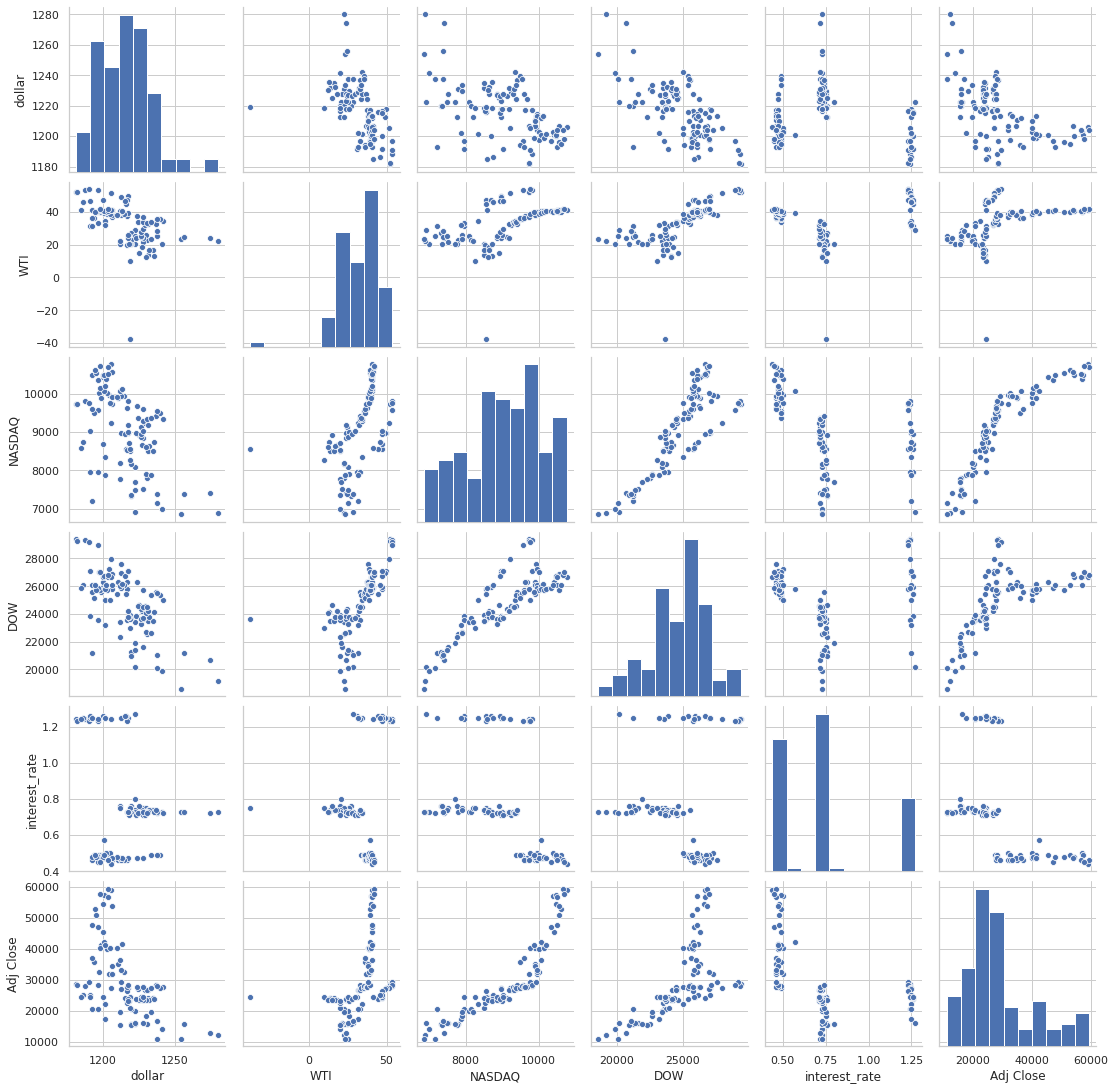

In [ ]:
# 산포행렬
sns.set( style='whitegrid' )
sns.pairplot( variable[0][ cols ], height=2.5 )
plt.show()
# 5개의 요인을 가진 종가를 무작위로 썩어서 데이터를 구성한것으로 보인다

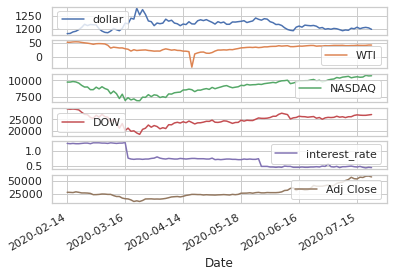

In [ ]:
variable[0][ cols ].plot(subplots=True)
plt.show()

In [ ]:
corr_tmp = np.corrcoef( variable[0][ cols ].values )
corr_tmp.shape

(106, 106)

In [ ]:
variable[0][ cols ].values.T.shape

(6, 106)

In [ ]:
corr_tmp = np.corrcoef( variable[0][ cols ].values.T )
corr_tmp.shape

(6, 6)

In [ ]:
corr_tmp

array([[ 1.        , -0.53391451, -0.53412107, -0.66837084, -0.17458121,
        -0.53801881],
       [-0.53391451,  1.        ,  0.53395207,  0.68080067,  0.15040818,
         0.45645554],
       [-0.53412107,  0.53395207,  1.        ,  0.8388122 , -0.47031852,
         0.88316033],
       [-0.66837084,  0.68080067,  0.8388122 ,  1.        , -0.00258169,
         0.63101143],
       [-0.17458121,  0.15040818, -0.47031852, -0.00258169,  1.        ,
        -0.48757773],
       [-0.53801881,  0.45645554,  0.88316033,  0.63101143, -0.48757773,
         1.        ]])

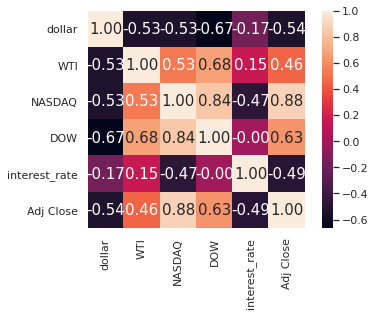

In [ ]:
# 히트맵으로 확인
sns.heatmap(corr_tmp, cbar=True, annot=True, square=True, fmt='.2f',
            annot_kws={'size':15}, yticklabels=cols, xticklabels=cols )
plt.show()

In [ ]:
variable[0].columns

Index(['Adj Close', 'name', 'code', 'dollar', 'WTI', 'NASDAQ', 'DOW',
       'interest_rate'],
      dtype='object')

In [ ]:
# 실제 변수들을 후진 제거법으로 처리하면서 성능을 확인
# -> 조합을 찾아라!!
# R제곱이 높으면서, VIF가 낮은 조합을 찾는다 => 사용할 독립변수 리스트다
# 대상 컬럼;
columns = variable[0].columns[3:8]
columns

Index(['dollar', 'WTI', 'NASDAQ', 'DOW', 'interest_rate'], dtype='object')

In [ ]:
# x, 독립변수 데이터 => df
target_df = variable[0][ columns ]
target_df.head(2)

,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,
2020-02-14,1181.5,52.05,9731.18,29398.08,1.24
2020-02-18,1182.2,52.05,9732.74,29232.19,1.23


In [ ]:
# y, 종속변수 데이터 => Series
y_data = variable[0][ 'Adj Close' ]
y_data[:2]

Date
2020-02-14    28500.0
2020-02-18    28300.0
Name: Adj Close, dtype: float64

In [ ]:
import random as r

In [ ]:
from sklearn.model_selection import train_test_split # 데이터를 훈련용, 테스트용으로 분리
from sklearn.metrics import r2_score                 # 머신러닝에서 성능평가도구, r제곱을 구하기 위해서 획득

In [ ]:
# 데이터 통계 모델이므로 : 훈련:테스트 = 7:3
# 단순회귀만
# random_state=42 -> 데이터를 셔플할때 사용하는 재료의 난수값을 42를 넣어서 나오는 
# 난수의 패턴으로 구성한다 => 시드를 고정한다
# 어떤 독립 변수가 성능 향상에 영향을 미쳤는지 체크할수 있다
# 실험환경을 통제한다 
X_train, X_test, y_train, y_test = train_test_split( target_df, y_data, train_size=0.7, 
                                                     random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((74, 5), (32, 5), (74,), (32,))

In [ ]:
# 회귀식의 상수를 만들기 위해서 0이 아닌값을 부여한다
# augmentation:수식을 간단하게 구성하기 위해, 0이 아닌 상수값을 부여하는 행위 
X_train_added = sm.add_constant(X_train)
X_train_added[:2]

,const,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,,
2020-02-28,1.0,1215.9,44.76,8567.37,25409.36,1.26
2020-05-07,1.0,1223.3,23.99,8979.66,23875.89,0.71


In [ ]:
# 독립변수가 전체다 적용 11개
full_model = sm.OLS( y_train, X_train_added)
full_model_res = full_model.fit()

In [ ]:
print( full_model_res.summary() )

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     86.96
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.66e-28
Time:                        08:26:26   Log-Likelihood:                -727.63
No. Observations:                  74   AIC:                             1467.
Df Residuals:                      68   BIC:                             1481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.368e+05   6.71e+04      2.041

In [ ]:
range( len( columns ) )

range(0, 5)

In [ ]:
# 후진 제거법 사용
# 1차로 수행할 방법 => 맨(앞)뒤에서 하나씩 교대로 제거
# 1회 수행시 독립변수는 총 몇개? 10개씩 -> 9개씩 -> 8개씩 -> 2개씩, 11개해결

# 순환하면서 컬럼을 10개씩 구성한다
print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
print( '-'*50 )
for idx in range( len( columns ) ):
  # 독립변수 원본을 리스트로 생성->사본
  tmp    = list(columns)
  # 반복적으로 해당 위치에 해당되는 컬럼 제거
  rm_col = tmp.pop(idx) # 제거된 컬럼명 rm_col에 수렴
  # 다중 회귀 모델 생성
  m_model = sm.OLS(  y_train, sm.add_constant( X_train[ tmp ] )  )
  m_model_res = m_model.fit()
  # 다중공선성을 점검하는 지표
  vif = 1/(1-m_model_res.rsquared)
  print( f'{rm_col:20} {m_model_res.rsquared:10} {vif:10}' )

  #print( tmp )

제거된컬럼                R제곱값       다중공선성     
--------------------------------------------------
dollar               0.8491863880911887 6.63070121684139
WTI                  0.8613190530571184 7.210795873869172
NASDAQ               0.7268287041675412 3.660706725985292
DOW                  0.8082343723902758 5.214698861649863
interest_rate        0.8601754402515616 7.151819407113621


In [ ]:
from itertools import permutations, combinations

In [ ]:
# 3개
three_cols = [ item for item in list( combinations( columns, 3 ) ) ]
len(three_cols)

10

In [ ]:
print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
print( '-'*50 )
# r제곱이 가장 컸을대
best_r_idx   = -1
best_rqsrd   = -1
best_vif2    = -1
# vif가 가장 작았을때
best_v_idx   = -1
best_rqsrd2  = -1
best_vif     = 10
for idx, cols in enumerate(three_cols):  
  m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(cols) ] )  )
  m_model_res = m_model.fit()
  # 다중공선성을 점검하는 지표
  vif = 1/(1-m_model_res.rsquared)
  #print( f'{idx:20} {m_model_res.rsquared:10} {vif:10}' )
  # 가장 높은 값일때 기록
  # r제곱
  if m_model_res.rsquared > best_rqsrd:# 현재 r제곱이, 현재 최고 R제곱보다 크면 갱신
    best_rqsrd = m_model_res.rsquared
    best_r_idx = idx
    best_vif2  = vif
  
  if vif < best_vif:# 현재 vif가 현제 최고 vif값보다 작으면 갱신
    best_vif   = vif
    best_v_idx = idx
    best_rqsrd2= m_model_res.rsquared

# 결과
print( "R제곱 기준",  best_r_idx, best_rqsrd, best_vif2, three_cols[best_r_idx] )
print( "VIF   기준",  best_v_idx, best_rqsrd2, best_vif, three_cols[best_v_idx] )

제거된컬럼                R제곱값       다중공선성     
--------------------------------------------------
R제곱 기준 3 0.8546334801068165 6.879163102582411 ('dollar', 'NASDAQ', 'DOW')
VIF   기준 1 0.4335796195008237 1.7654731969896944 ('dollar', 'WTI', 'DOW')


In [ ]:
print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
print( '-'*50 )
# r제곱이 가장 컸을대
best_r_idx   = -1
best_rqsrd   = -1
best_vif2    = -1
best_n1      = 0

best_v_idx   = -1
best_rqsrd2  = -1
best_vif     = 10
best_n2      = 0

for n in range(2, len(columns)):
  three_cols = [ item for item in list( combinations( columns, n ) ) ]
  for idx, cols in enumerate(three_cols):  
    m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(cols) ] )  )
    m_model_res = m_model.fit()
    vif = 1/(1-m_model_res.rsquared)
    if m_model_res.rsquared > best_rqsrd:# 현재 r제곱이, 현재 최고 R제곱보다 크면 갱신
      best_rqsrd = m_model_res.rsquared
      best_r_idx = idx
      best_vif2  = vif
      best_n1    = n
    
    if vif < best_vif:# 현재 vif가 현제 최고 vif값보다 작으면 갱신
      best_vif   = vif
      best_v_idx = idx
      best_rqsrd2= m_model_res.rsquared
      best_n2    = n

# 결과
print( "R제곱 기준",  best_r_idx, best_rqsrd, best_vif2, best_n1 )

제거된컬럼                R제곱값       다중공선성     
--------------------------------------------------
R제곱 기준 3 0.8613190530571184 7.210795873869172 4


In [ ]:
# best_n1이 4이므로 마지막에 세팅된 조합 three_cols에서 독립변수 조합 확인
three_cols[ best_r_idx ]

('dollar', 'NASDAQ', 'DOW', 'interest_rate')

In [ ]:
# 만약 0.7이상이 된다면 => 예측을 수행하고, R제곱을 구해서 비교를 해야한다
# 예측을 수행 => 한번도 접하지 않은 데이터를 이용하여 예측
# five_cols[ best_r_idx ] => 모든 조합의 평가후 최고 베스트 R제곱을 만들어낸 독립변수조합


In [ ]:
m_model_res.rsquared

0.8491863880911887

In [ ]:
X_test[:1]

,dollar,WTI,NASDAQ,DOW,interest_rate
Date,,,,,
2020-07-15,1206.4,41.2,10550.49,26870.1,0.47


In [ ]:
# 현재 가장 좋은 점수를 받은 모델을 생성
# 신규 데이터를 넣어서 예측
# X_test
# 모델 만들때 사용했던 컬럼 목록
target_cols = list(three_cols[ best_r_idx ])
# 예측할때 데이터도 동일하게 맞춰준다
y_pred = m_model_res.predict( sm.add_constant(X_test[target_cols]) )

In [ ]:
# 모델의 r제곱과
# 예측한 결과를 가진 r제곱간의 비교
# y_pred, y_test
# 평가도구
from sklearn.metrics import r2_score
r2_score( y_test, y_pred ), m_model_res.rsquared
# 성능은 거의 유사하게 나온다 => 성능평가를 수행, 검증

(-88.07381914387875, 0.8491863880911887)

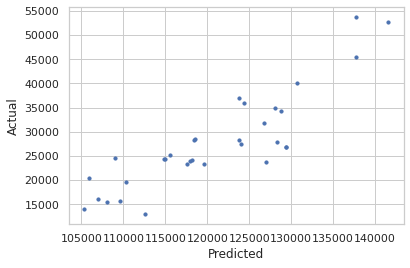

In [ ]:
plt.scatter(y_pred, y_test, s=10)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

********************************************************************************************************************************************************************************************************
일진다이아
********************************************************************************************************************************************************************************************************


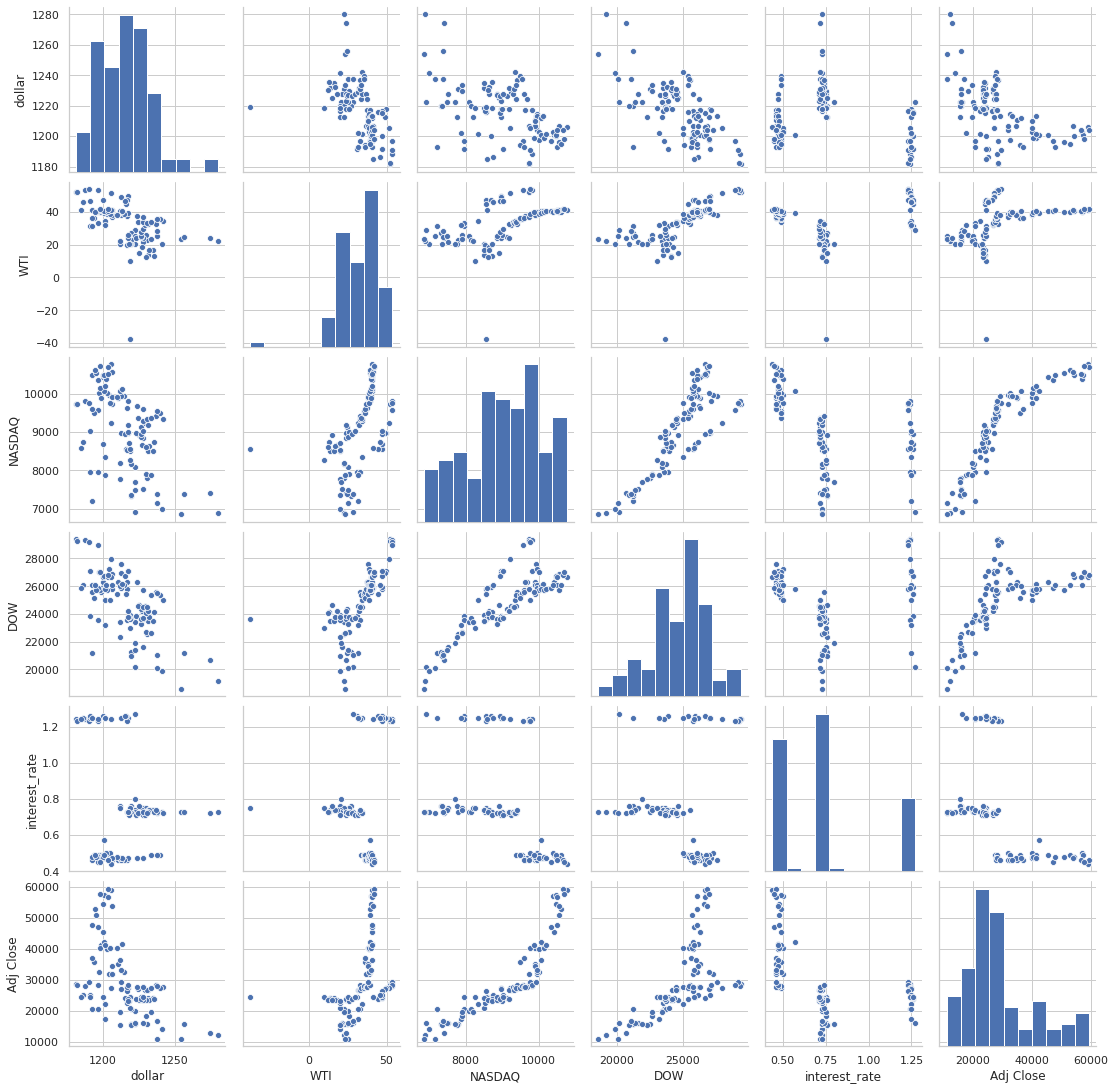

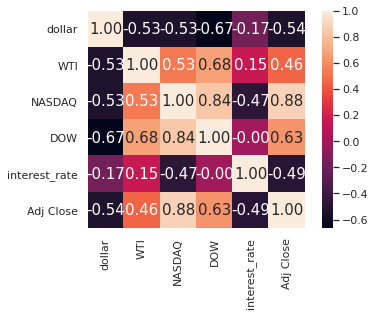

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     86.96
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           3.66e-28
Time:                        10:00:52   Log-Likelihood:                -727.63
No. Observations:                  74   AIC:                             1467.
Df Residuals:                      68   BIC:                             1481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.368e+05   6.71e+04      2.041

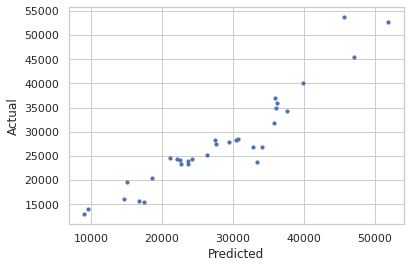

********************************************************************************************************************************************************************************************************
디피씨
********************************************************************************************************************************************************************************************************


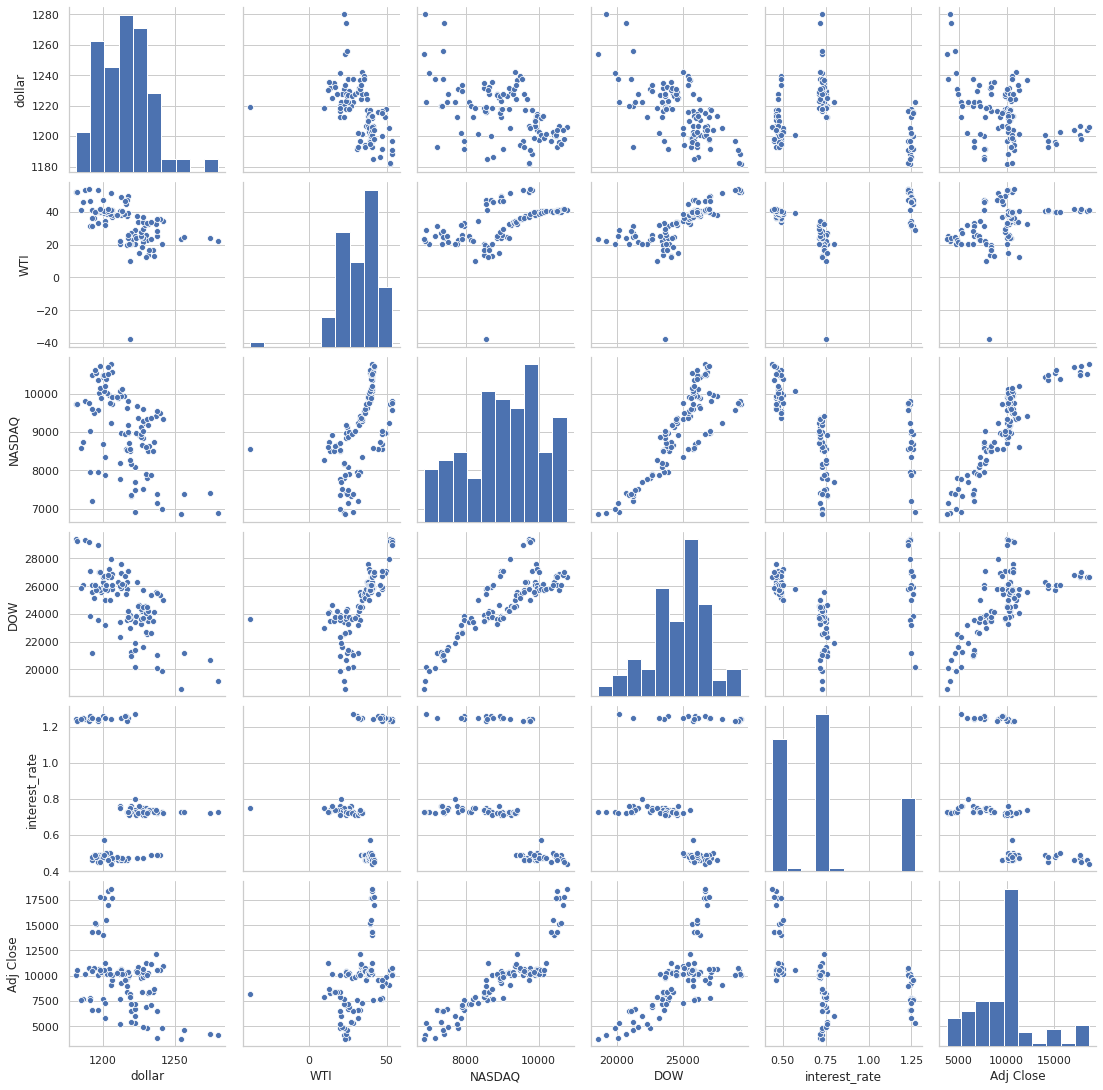

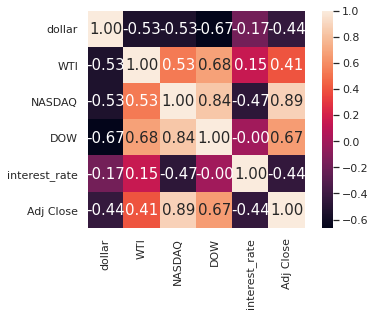

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     60.59
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.04e-23
Time:                        10:01:02   Log-Likelihood:                -643.11
No. Observations:                  74   AIC:                             1298.
Df Residuals:                      68   BIC:                             1312.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.418e+04   2.14e+04     -1.598

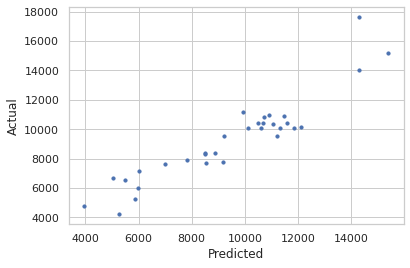

********************************************************************************************************************************************************************************************************
효성중공업
********************************************************************************************************************************************************************************************************


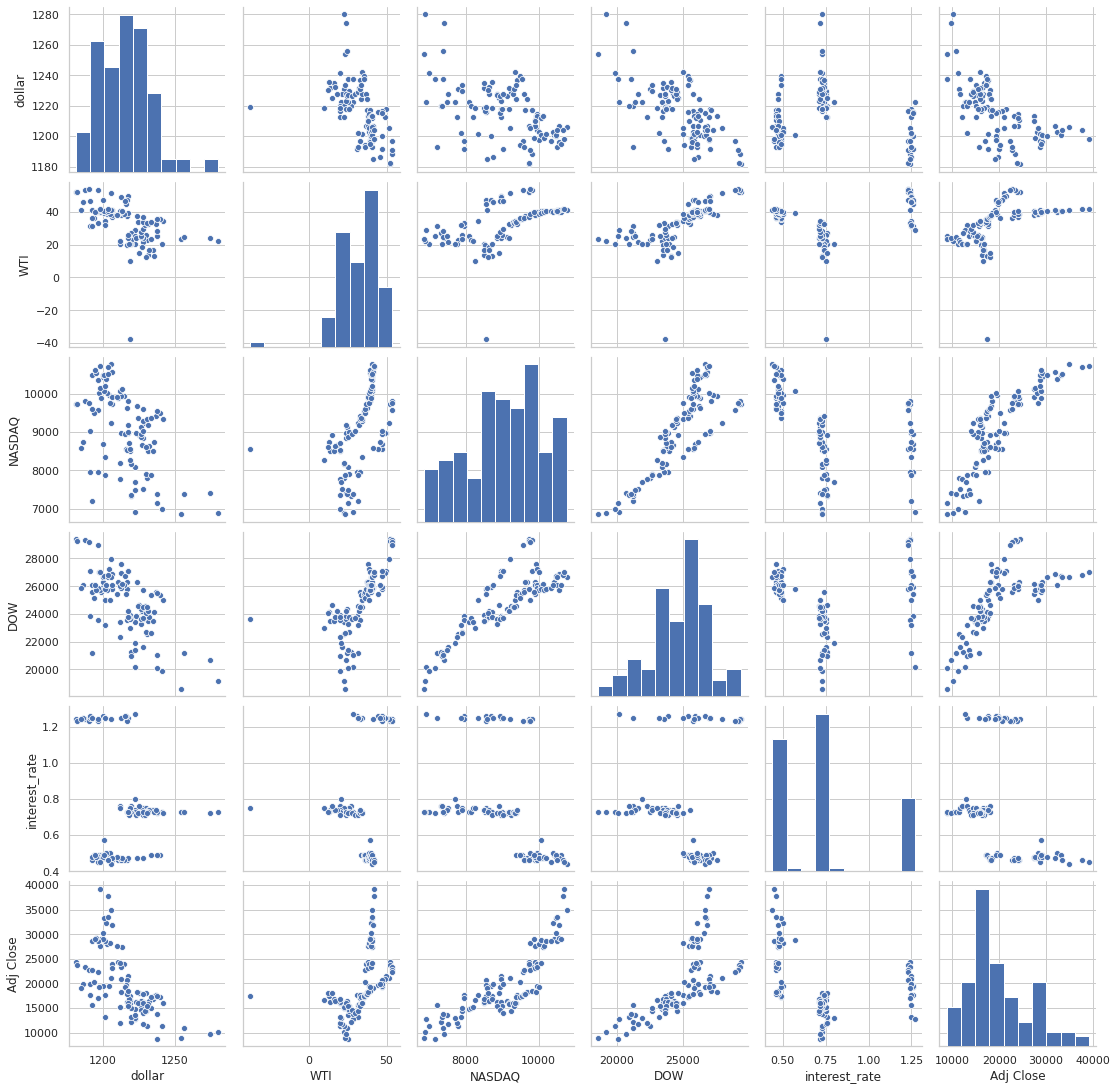

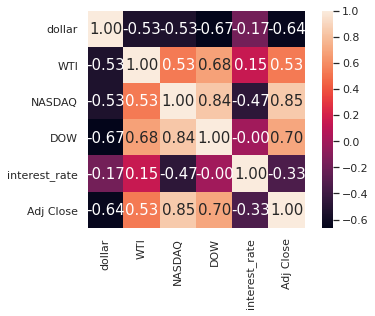

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     57.52
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           4.32e-23
Time:                        10:01:12   Log-Likelihood:                -698.37
No. Observations:                  74   AIC:                             1409.
Df Residuals:                      68   BIC:                             1423.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.237e+05   4.52e+04      2.739

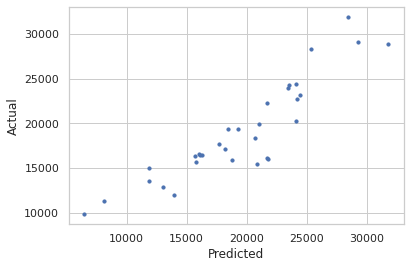

********************************************************************************************************************************************************************************************************
JW중외제약우
********************************************************************************************************************************************************************************************************


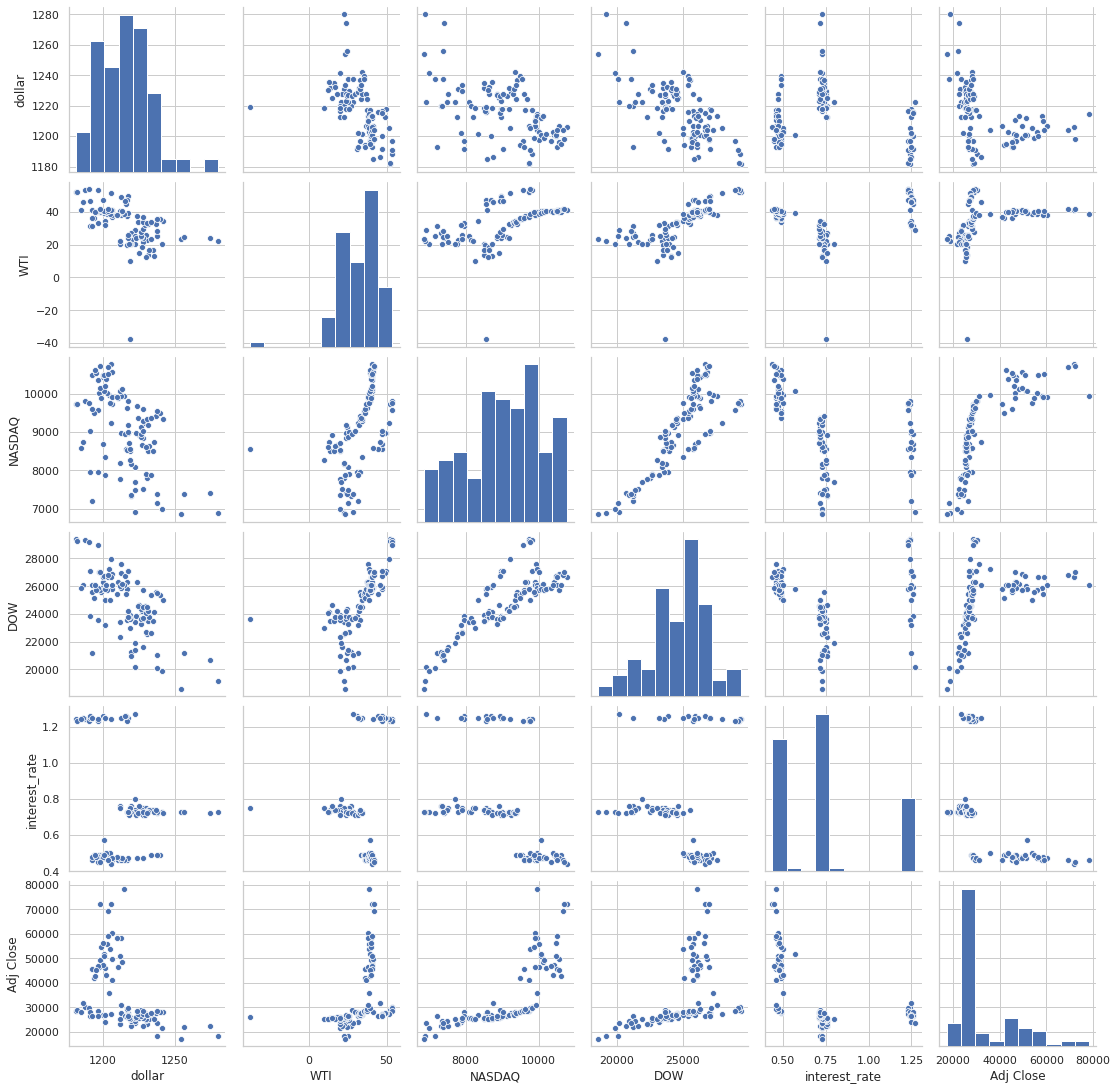

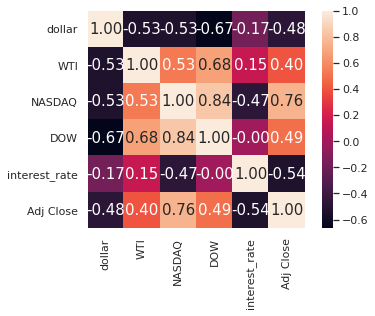

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           1.30e-17
Time:                        10:01:22   Log-Likelihood:                -765.78
No. Observations:                  74   AIC:                             1544.
Df Residuals:                      68   BIC:                             1557.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.445e+05   1.12e+05      3.068

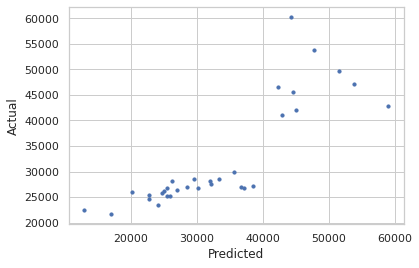

********************************************************************************************************************************************************************************************************
코오롱머티리얼
********************************************************************************************************************************************************************************************************


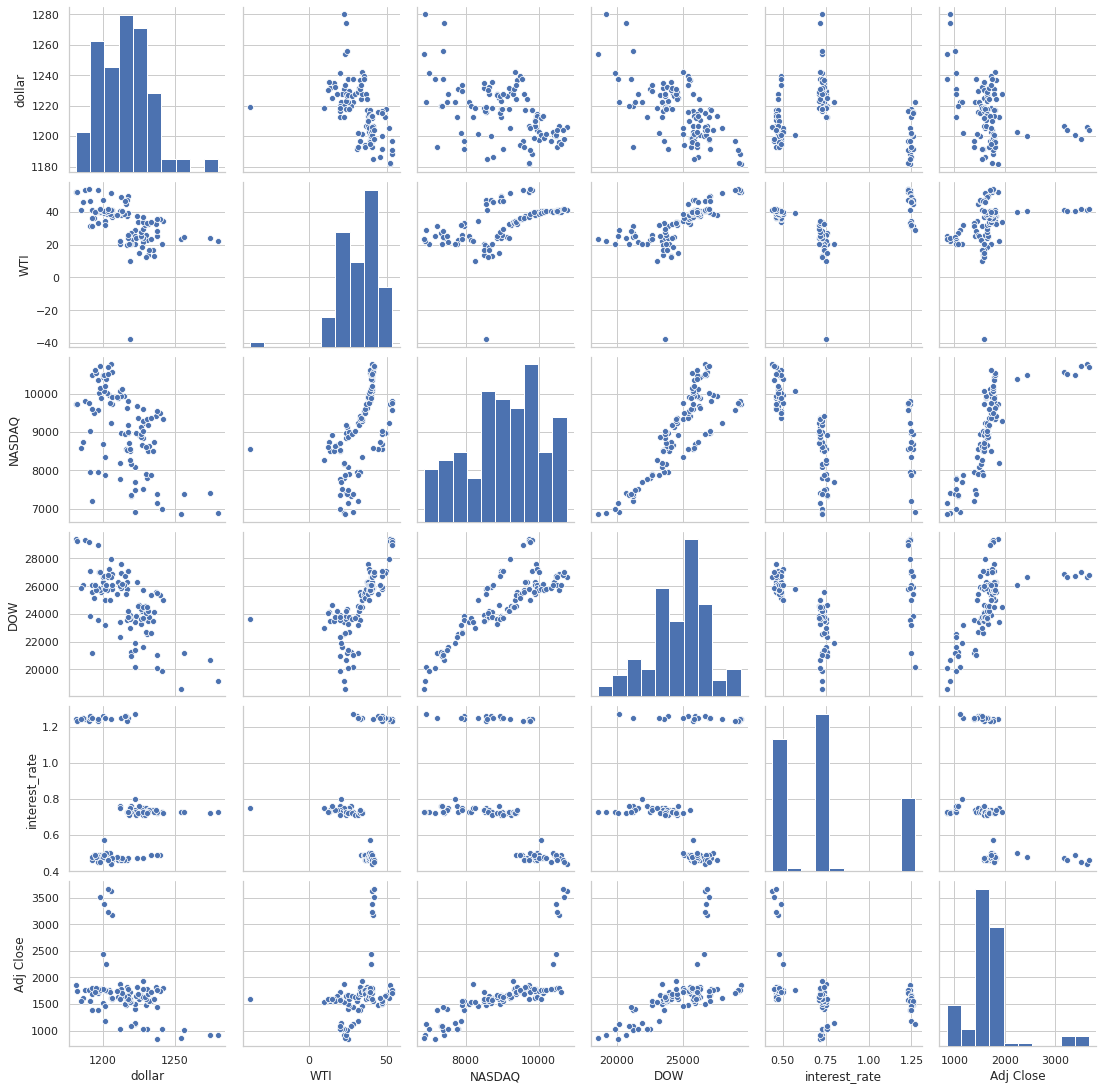

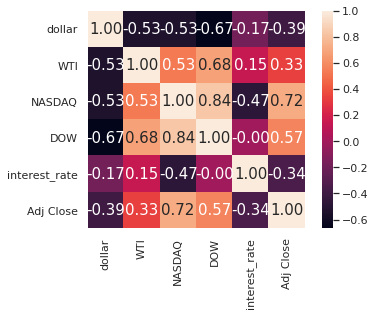

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     16.94
Date:                Wed, 29 Jul 2020   Prob (F-statistic):           7.64e-11
Time:                        10:01:32   Log-Likelihood:                -542.06
No. Observations:                  74   AIC:                             1096.
Df Residuals:                      68   BIC:                             1110.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1934.7856   5461.475     -0.354

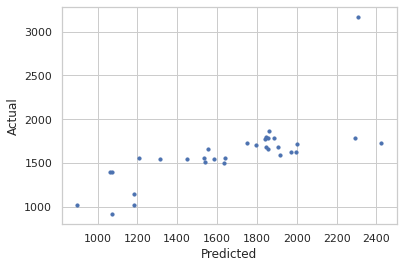

In [ ]:
cols = ['dollar', 'WTI', 'NASDAQ', 'DOW', 'interest_rate', 'Adj Close']
for i in range(5):
  print('*'*200)
  print(variable[i]['name'][0] )
  print('*'*200)
  sns.set( style='whitegrid' )
  sns.pairplot( variable[i][ cols ], height=2.5 )
  plt.show()
  corr_tmp = np.corrcoef( variable[i][ cols ].values.T )
  corr_tmp.shape
  corr_tmp
  sns.heatmap(corr_tmp, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols )
  plt.show()
  columns = variable[i].columns[3:8]
  columns
  target_df = variable[i][ columns ]
  y_data = variable[i][ 'Adj Close' ]
  X_train, X_test, y_train, y_test = train_test_split( target_df, y_data, train_size=0.7, random_state=42)
  X_train.shape, X_test.shape, y_train.shape, y_test.shape
  X_train_added = sm.add_constant(X_train)
  full_model = sm.OLS( y_train, X_train_added)
  full_model_res = full_model.fit()
  print( full_model_res.summary() )

    #독립변수 5개중 하나씩 제거하면서 R제곱값, 다중공선성 구하기
  print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
  print( '-'*50 )
  for idx in range( len( columns ) ):
    tmp    = list(columns)
    rm_col = tmp.pop(idx) 
    m_model = sm.OLS(  y_train, sm.add_constant( X_train[ tmp ] )  )
    m_model_res = m_model.fit()
    vif = 1/(1-m_model_res.rsquared)
    print( f'{rm_col:20} {m_model_res.rsquared:10} {vif:10}' )

    four_cols = [ item for item in list( combinations( columns, 4 ) ) ]
    print( f'{"제거된컬럼":20} {"R제곱값":10} {"다중공선성":10}' )
    print( '-'*50 )
  # r제곱이 가장 컸을대
  best_r_idx   = -1
  best_rqsrd   = -1
  best_vif    = -1
  best_n      = 0

  best_v_idx2   = -1
  best_rqsrd2  = -1
  best_vif2     = 10
  best_n2      = 0

  for n in range(2, len(columns)):
    four_cols = [ item for item in list( combinations( columns, n ) ) ]
    for idx, col in enumerate(four_cols):  
      m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(col) ] )  )
      m_model_res = m_model.fit()
      vif = 1/(1-m_model_res.rsquared)
      if m_model_res.rsquared > best_rqsrd:# 현재 r제곱이, 현재 최고 R제곱보다 크면 갱신
        best_rqsrd = m_model_res.rsquared
        best_r_idx = idx
        best_vif  = vif
        best_n    = n
      
      if vif < best_vif2:# 현재 vif가 현제 최고 vif값보다 작으면 갱신
        best_vif2   = vif
        best_v_idx2 = idx
        best_rqsrd2= m_model_res.rsquared
        best_n2    = n

  # 결과
  print( "R제곱 기준",  best_r_idx, best_rqsrd, best_vif, best_n )
  print( "vif 기준",  best_v_idx2, best_rqsrd2, best_vif2, best_n2 )
  four_cols[ best_r_idx ]
  m_model = sm.OLS(  y_train, sm.add_constant( X_train[ list(four_cols[ best_r_idx ]) ] )  )
  m_model_res = m_model.fit()
  m_model_res.rsquared
  target_cols = list(four_cols[ best_r_idx ])
  y_pred = m_model_res.predict( sm.add_constant(X_test[target_cols]) )
  from sklearn.metrics import r2_score
  print("성능평가", r2_score( y_test, y_pred ), m_model_res.rsquared)
  plt.scatter(y_pred, y_test, s=10)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")

  plt.show()

